In [2]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [2]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [88]:
import pandas as pd

pd.set_option("display.max_columns", 500)

## 0.1 python env setup
1. create new project on pycharm.
1. setup virtualenv or anaconda controled python environment.
1. install pandas and seaborn to the new environment.
1. install black for formating. 

## 0.2 project structure
1. create data folder
1. add data to the folder


## 0.3 version control
1. create new git repo
1. add .gitignore file
1. add readme.md and describe the project goal
1. make first commit 

## 0.4 jupyter setup
2. enable black for jupyter. There are several options - find the one that works. `https://black.readthedocs.io/en/stable/getting_started.html`
2. change cell jupyter cell options to fill 90% of the page widht. `
https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
`

## 0.5 pandas setup
3. change pandas options to display 50 columns.
`https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe`


## 1 review and handling data
1. load data. 
1. sample 5 rows. 
    1. review values
    2. review column names
        3. find column names descriptions `https://www.kaggle.com/datasets/pavlofesenko/titanic-extended`
1. review each column
    1. check nan values
    2. check column type
1. drop small value columns. 
    1. PassengerId
    2. Body
2. rename column names according python variable naming convention `https://stackoverflow.com/questions/159720/what-is-the-naming-convention-in-python-for-variable-and-function`
3. count column survived values, include nan values into the output. 
3. create a new dataset that holds non-null values Survived columns.
3. reset new dataset index, use attribute `drop=True`
1. review each column of new dataset
    1. check nan values
    2. check column type
1. fill nan values. 
    1. age - fill in using median value of age and pclass group.
    2. cabin
        1. option 1 [easy]: sample from existing cabins random cabin and assign to a class groups. 
        1. option 2 [hard]: check cabin naming convention with respect to a class. Create new cabin numbers. Assign randomly for class groups.  **[additional]**
    3. do we need to fill nan in lifeboat? 
        4. if yes fill na, else create a value indicating that a passenged did not use a boat. 
2. drop rest of the rows that have at least one nan value.

## 2 data transformations
1. find and remove duplicates
1. add a name to column index. name = "features".
2. transform embarked column values to port names. Use map function and dictionary. 
5. compare column "embarked" and "boarded" values. Unify and drop "boarded" column. 
3. compare column "age" and "age_wiki" values. Unify and drop "age_wiki" column. 
4. compare column "pclass" and "class" values. Unify and drop "class" column. 
5. drop column "wikiid"
3. use map function to extract town and country from Hometown column. Extracted values save as additional columns `df["home_town"], df["home_country"]`
3. use map function to extract town and country from Hometown column. Extracted values save as additional columns `df["destition_town"], df["destination_country"]`
4. create a column that indicates - is traveler coming home or emigrating. Column name "travel_direction"
5. create dummy variables from column "sex".
5. create column "age_groups" by puting age column values into bins. 0-12,12-18,18-25,25-35, 35-50,50-65,65+. Use pd.cut function. 
5. create column "labeled_age_groups" by puting age column values into bins. 0-12,12-18,18-25,25-35, 35-50,50-65,65+. Use pd.cut function. and create labels for every bin. 
6. create column "fare_quantiles" from column "fare". Use pd.qcut. Print out quantile edge values. 

## 3 string manipulation
1. create column "initials" using column "name". Initials are `Mr., Mrs., etc.`. 
1. create column "wiki_initials" using column "name_wiki". Initials are `Mr., Mrs., etc.`. 
5. compare column "initials" and "wiki_initials" values. Unify and drop "wiki_initials" column. 
6. create column "first_name" using columns "name" and "name_wiki". If person has more than one name extract all names. 
6. create column "last_name" using columns "name" and "name_wiki".  If person has more than one surname extract all surnames. 
7. drop columns "name" and "name_wiki"

## 4 EDA 
### Plot
1. Plot column "survived" values as pie chart and bar plot. 
2. Plot "sex" column values.
2. Split "survived" values by "sex". Plot survived values split by sex. 
2. create corsstab using columns "survived" and "pclass". 
2. Split "survived" values by "pclass". Plot survived values split by pclass. 
2. create crosstab using columns "survived" and keys "pclass" and "sex".
2. Draw factorplot using seaboarn. sns.factorplot.
2. draw survived plot with respect to "age_groups". 
2. draw survived plot with respect to "labeled_age_groups". 
2. draw survived plot with respect to "fare_quantiles". 

### Investigate groups
1. Find top 5 most common names splitted by class. 
1. Find top 5 most common names splitted by class and sex. 
1. Find top 5 most common names splitted by class and age groups. 
2. Count passengers traveling home or emigrating. 
2. Count passengers by continents. 
2. Count passengers by countries. 
2. Count passengers by cities. 
3. plot survived column by countries. 
3. plot survived column by continents. 
3. what is the distribution of classes with respect to destination country/town? 
3. what is the distribution of classes with respect to embarked pord? 


In [89]:
df = pd.read_csv("data/titanic.csv")

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0
2,763,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,NaN,3.0
3,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,NaN,3.0
4,772,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,NaN,3.0


In [91]:
import numpy as np

In [92]:
titanic = pd.DataFrame(df)

In [93]:
titanic.iloc[:, : 5]

,PassengerId,Survived,Pclass,Name,Sex
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female
1,523,0.0,3,"Lahoud, Mr. Sarkis",male
2,763,1.0,3,"Barah, Mr. Hanna Assi",male
3,1149,NaN,3,"Niklasson, Mr. Samuel",male
4,772,0.0,3,"Jensen, Mr. Niels Peder",male
...,...,...,...,...,...
1726,917,NaN,3,"Robins, Mr. Alexander A",male
1727,451,0.0,2,"West, Mr. Edwy Arthur",male
1728,455,0.0,3,"Peduzzi, Mr. Joseph",male
1729,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female


In [7]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')


In [83]:
print(pd.isna(titanic))

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [86]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
titanic.drop(['PassengerId', 'Body'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class
0,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,3.0
1,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
3,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,NaN,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.5000,NaN,S,1157.0,"Robins, Mr. Alexander A.",50.0,"St Austell, Cornwall, England",Southampton,"Yonkers, New York, US",NaN,3.0
1727,0.0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,596.0,"West, Mr. Edwy Arthur",36.0,"Bournemouth, Dorset, England",Southampton,"Gainesville, Florida, US",NaN,2.0
1728,0.0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S,1123.0,"Peduzzi, Mr. Giuseppe",24.0,"London, England",Southampton,New York City,NaN,3.0
1729,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,67.0,"Cavendish, Mrs. Julia Florence (née Siegel)",25.0,"London, England, UK",Southampton,"New York, New York, US",6,1.0


In [95]:
titanic.rename(columns={"Survived": "survived", "Pclass": "p_class", "Name": "name", "Sex": "sex", "Age": "age", "SibSp": "sib_sp", "Parch": "parch", 
                        "Ticket": "ticket", "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked", "WikiId": "wiki_id", "Name_wiki": "name_wiki",
                       "Age_wiki": "age_wiki", "Hometown": "hometown", "Boarded": "boarded", "Destination": "destination", "Lifeboat": "lifeboat", "Class": "class"}, inplace = True)

In [176]:
titanic.head(4)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,Body,class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0
2,763,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,NaN,3.0
3,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,NaN,3.0


In [105]:
data = {'PassengerId': ['1106', '523', '763', '1149'], 'survived': ['NaN', '0.0', '1.0', 'NaN'], 
        'p_class': ['3', '3', '3', '3'], 'name': ['Andersson, Miss. Ida Augusta Margareta', 'Lahoud, Mr. Sarkis', 'Barah, Mr. Hanna Assi', 'Niklasson, Mr. Samuel'], 
        'sex': ['female', 'male', 'male', 'male'], 'age': ['38.0', 'NaN', '20.0', '28.0'], 'sib_sp': ['4', '0', '0', '0'],
       'parch': ['2', '0', '0', '0'], 'ticket': ['347091', '2624', '2663', '363611'], 'fare': ['7.7750', '7.2250', '7.2292', '8.0500'],
       'cabin': ['NaN', 'NaN', 'NaN', 'NaN'], 'embarked': ['S', 'C', 'C', 'S'], 'wiki_id': ['640.0', '949.0', '852.0', '1067.0'],
       'name_wiki': ['Andersson, Miss Ida Augusta Margareta', 'Lahoud Ishaq Mowad, Mr. Sarkis', 'Hanna, Mr. Borak Suleiman', 'Niklasson, Mr. Samuel'], 'age_wiki': ['38.0', '30.0', '27.0', '28.0'],
       'hometown': ['Vadsbro, Sörmland, Sweden', 'Zgharta, Lebanon', 'Hardîne, Lebanon', 'Västra Bogane, Orust Island, Sweden'], 'boarded': ['Southampton', 'Cherbourg', 'Cherbourg', 'Southampton'], 
        'destination': ['Manistee, Michigan, US', 'Waterbury, Connecticut, US', 'Wilkes-Barre, Pennsylvania, US', 'New York City'], 
        'lifeboat': ['NaN', 'NaN', '15', 'NaN'], 'Body': ['NaN', 'NaN', 'NaN', 'NaN'], 'class': ['3.0', '3.0', '3.0', '3.0']}
naujas = pd.DataFrame(data)
naujas

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,Body,class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0
2,763,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,NaN,3.0
3,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,NaN,3.0


In [96]:
surnived_total = (titanic['survived'].count()) + (titanic['survived'].isna().sum())
surnived_total

1731

In [10]:
survived = titanic[['survived']].copy().dropna()
survived

,survived
1,0.0
2,1.0
4,0.0
6,0.0
8,0.0
...,...
1721,1.0
1723,0.0
1727,0.0
1728,0.0


In [11]:
survived.reset_index(drop=True)

,survived
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1187,1.0
1188,0.0
1189,0.0
1190,0.0


In [12]:
survived.isna()

,survived
1,False
2,False
4,False
6,False
8,False
...,...
1721,False
1723,False
1727,False
1728,False


In [97]:
survived['survived'].isna().sum()

0

In [14]:
survived[survived.isnull().any(axis=1)]

,survived


In [15]:
survived.dtypes

survived    float64
dtype: object

In [16]:
titanic[['age', 'p_class']].median()

age        28.0
p_class     3.0
dtype: float64

In [17]:
titanic[['age']].fillna(titanic[['age', 'p_class']].median())

,age
0,38.0
1,28.0
2,20.0
3,28.0
4,48.0
...,...
1726,50.0
1727,36.0
1728,28.0
1729,76.0


In [18]:
titanic[['age']].fillna(titanic[['age']].median())

,age
0,38.0
1,28.0
2,20.0
3,28.0
4,48.0
...,...
1726,50.0
1727,36.0
1728,28.0
1729,76.0


In [98]:
titanic = titanic.drop_duplicates(keep='first')
titanic.duplicated().sum()

0

In [20]:
titanic.index.name = "features"

In [21]:
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,Body,class
features,,,,,,,,,,,,,,,,,,,,,
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.225,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0


In [22]:
titanic['embarked'].str.startswith("S")

features
0        True
1       False
2       False
3        True
4        True
        ...  
1724     True
1725    False
1726     True
1728     True
1729     True
Name: embarked, Length: 1309, dtype: object

fill nan values. age - fill in using median value of age and pclass group.

In [99]:
titanic['age'] = pd.to_numeric(titanic['age'], errors='coerce')
medianas= titanic.groupby('p_class')['age'].transform('median')
titanic['age'] = titanic['age'].fillna(medianas)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,Body,class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0


In [100]:
def random_sample(series):
    non_nan_values = series.dropna()
    return np.random.choice(non_nan_values) if len(non_nan_values) > 0 else np.nan

titanic['cabin'] = titanic.groupby('p_class')['cabin'].transform(random_sample)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,Body,class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0


In [101]:
embarked_df = pd.DataFrame(titanic['embarked'])
boarded_df = pd.DataFrame(titanic['boarded'])
port_mapping_dict = dict(zip(boarded_df['boarded'], embarked_df['embarked']))
titanic['embarked'] = titanic['embarked'].replace(port_mapping_dict)
titanic.drop(columns=['boarded'], inplace=True)
titanic.rename(columns={'embarked': 'boarded'}, inplace=True)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,wiki_id,name_wiki,age_wiki,hometown,destination,lifeboat,Body,class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,3.0


In [102]:
titanic.loc[titanic['age'].isnull(), 'age'] = titanic['age_wiki']
titanic.drop(columns=['age_wiki'], inplace=True)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,wiki_id,name_wiki,hometown,destination,lifeboat,Body,class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,640.0,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,3.0


In [103]:
titanic.loc[titanic['p_class'].isnull(), 'p_class'] = titanic['class']
titanic.drop(columns=['class'], inplace=True)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,wiki_id,name_wiki,hometown,destination,lifeboat,Body
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,640.0,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN


In [104]:
titanic.drop(columns=['wiki_id'], inplace=True)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN


In [105]:
def extract_town_country(hometown):
    if isinstance(hometown, str): 
        town, country = hometown.split(', ')[0], hometown.split(', ')[-1]
        return town, country
    else:
        return np.nan, np.nan

titanic['home_town'], titanic['home_country'] = zip(*titanic['hometown'].map(extract_town_country))
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon


In [106]:
def extract_town_country(destination):
    if isinstance(destination, str): 
        town, country = destination.split(', ')[0], destination.split(', ')[-1]
        return town, country
    else:
        return pd.NA, pd.NA

titanic['destination_town'], titanic['destination_country'] = zip(*titanic['destination'].map(extract_town_country))
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US


In [107]:
def determine_travel_direction(row):
    home_town = row['home_town']
    destination_town = row['destination_town']
    if home_town != home_town or destination_town != destination_town:
        return pd.NA  # Replace NA values with pd.NA
    elif destination_town == home_town:
        return 'coming home'
    else:
        return 'emigrating'

titanic['travel_direction'] = titanic.apply(determine_travel_direction, axis=1)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating


In [108]:
sex_dummies = pd.get_dummies(titanic['sex'], prefix='sex')
titanic = pd.concat([titanic, sex_dummies], axis=1)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True


In [109]:
bins = [0, 12, 18, 25, 35, 50, 65, float('inf')]
labels = ['0-12', '12-18', '18-25', '25-35', '35-50', '50-65', '65+']
titanic['age_groups'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25


In [110]:
bins = [0, 12, 18, 25, 35, 50, 65, float('inf')]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-aged', 'Senior', 'Elderly']
titanic['labeled_age_groups'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult


In [112]:
titanic['fare_quantiles'], quantile_edges = pd.qcut(titanic['fare'], q=4, labels=False, retbins=True)
print("Quantile Edge Values:")
for i, edge in enumerate(quantile_edges):
    print(f"Quantile {i+1} edge value: {edge}")
titanic.head(2)

Quantile Edge Values:
Quantile 1 edge value: 0.0
Quantile 2 edge value: 7.8958
Quantile 3 edge value: 14.4542
Quantile 4 edge value: 31.275
Quantile 5 edge value: 512.3292


,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0


In [113]:
titanic['initials'] = titanic['name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr


In [118]:
titanic['wiki_initials'] = titanic['name_wiki'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials,wiki_initials
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss,NaN
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr,Mr


In [119]:
titanic['initials'].fillna(titanic['wiki_initials'], inplace=True)
titanic.drop(columns=['wiki_initials'], inplace=True)
titanic.head(2)

C:\Users\erika\AppData\Local\Temp\ipykernel_41460\3669648085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['initials'].fillna(titanic['wiki_initials'], inplace=True)


,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr


In [120]:
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr


In [121]:
def extract_first_names(row):
    names = set()  # Use a set to ensure each name appears only once
    if isinstance(row['name'], str) and ('Mrs.' in row['name'] or 'Miss.' in row['name'] or 'Mr.' in row['name']):
        name_split = row['name'].split()
        idx = name_split.index('Mrs.') if 'Mrs.' in name_split else (name_split.index('Miss.') if 'Miss.' in name_split else name_split.index('Mr.'))
        names.update(name.rstrip(',') for name in name_split[idx+1:])
    if isinstance(row['name_wiki'], str) and ('Mrs.' in row['name_wiki'] or 'Miss.' in row['name_wiki'] or 'Mr.' in row['name_wiki']):
        name_split = row['name_wiki'].split()
        idx = name_split.index('Mrs.') if 'Mrs.' in name_split else (name_split.index('Miss.') if 'Miss.' in name_split else name_split.index('Mr.'))
        names.update(name.rstrip(',') for name in name_split[idx+1:])
    return ' '.join(names)  # Join names into a single string without commas

titanic['first_name'] = titanic.apply(extract_first_names, axis=1)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials,first_name
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss,Ida Margareta Augusta
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr,Sarkis


In [122]:
def extract_last_names(row):
    last_names = set()  # Use a set to ensure each last name appears only once
    if isinstance(row['name'], str) and ('Mrs.' in row['name'] or 'Miss.' in row['name'] or 'Mr.' in row['name']):
        name_split = row['name'].split()
        idx = next(i for i, x in enumerate(name_split) if x in ('Mrs.', 'Miss.', 'Mr.'))  # Find the index where the title occurs
        last_names.add(name_split[idx-1].strip(','))  # Add the token before the title as the last name
    if isinstance(row['name_wiki'], str) and ('Mrs.' in row['name_wiki'] or 'Miss.' in row['name_wiki'] or 'Mr.' in row['name_wiki']):
        name_split = row['name_wiki'].split()
        idx = next(i for i, x in enumerate(name_split) if x in ('Mrs.', 'Miss.', 'Mr.'))  # Find the index where the title occurs
        last_names.add(name_split[idx-1].strip(','))  # Add the token before the title as the last name
    return ' '.join(last_names)  # Join last names into a single string

titanic['last_name'] = titanic.apply(extract_last_names, axis=1)
titanic.head(2)

,PassengerId,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,name_wiki,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials,first_name,last_name
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,G6,S,"Andersson, Miss Ida Augusta Margareta","Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss,Ida Margareta Augusta,Andersson
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,24.0,0,0,2624,7.225,G6,C,"Lahoud Ishaq Mowad, Mr. Sarkis","Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr,Sarkis,Mowad Lahoud


In [123]:
titanic.drop(columns=['name', "name_wiki"], inplace=True, errors='ignore')
titanic.head(2)

,PassengerId,survived,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,boarded,hometown,destination,lifeboat,Body,home_town,home_country,destination_town,destination_country,travel_direction,sex_female,sex_male,age_groups,labeled_age_groups,fare_quantiles,initials,first_name,last_name
0,1106,NaN,3,female,38.0,4,2,347091,7.775,G6,S,"Vadsbro, Sörmland, Sweden","Manistee, Michigan, US",NaN,NaN,Vadsbro,Sweden,Manistee,US,emigrating,True,False,35-50,Middle-aged,0.0,Miss,Ida Margareta Augusta,Andersson
1,523,0.0,3,male,24.0,0,0,2624,7.225,G6,C,"Zgharta, Lebanon","Waterbury, Connecticut, US",NaN,NaN,Zgharta,Lebanon,Waterbury,US,emigrating,False,True,18-25,Young Adult,0.0,Mr,Sarkis,Mowad Lahoud


In [48]:
import matplotlib.pyplot as plt

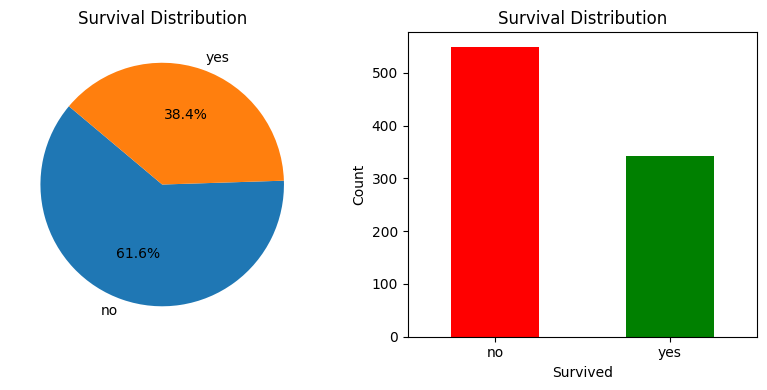

In [124]:
titanic['survived'] = titanic['survived'].replace({1.0: 'yes', 0.0: 'no'})
survival_counts = titanic['survived'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].pie(survival_counts, labels=survival_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Survival Distribution')
survival_counts.plot(kind='bar', ax=axs[1], color=['red', 'green'])
axs[1].set_title('Survival Distribution')
axs[1].set_xlabel('Survived')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

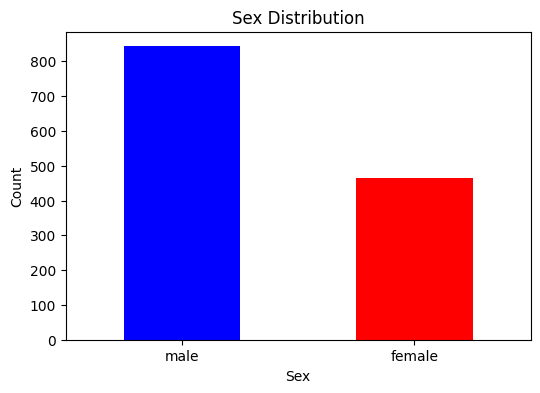

In [85]:
sex_counts = titanic['sex'].value_counts()

plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

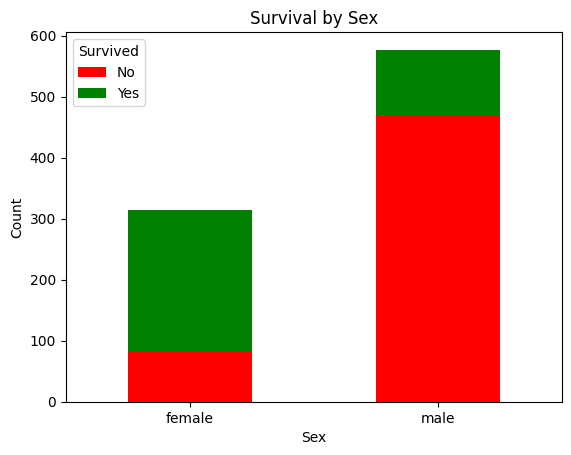

In [100]:
titanic.dropna(subset=['sex', 'survived'], inplace=True)

survival_by_sex = titanic.groupby(['sex', 'survived']).size().unstack()

plt.figure(figsize=(6, 4))
survival_by_sex.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [95]:
titanic.dropna(subset=['survived', 'p_class'], inplace=True)
titanic['p_class'] = titanic['p_class'].astype(int)
survival_by_pclass = titanic.groupby(['p_class', 'survived']).size().unstack()
print(survival_by_pclass)

survived   no  yes
p_class           
1          80  136
2          97   87
3         372  119


<Figure size 600x400 with 0 Axes>

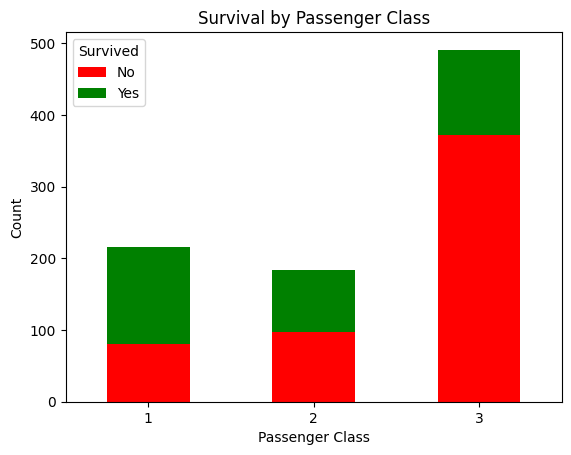

In [109]:
plt.figure(figsize=(6,4))
survival_by_pclass.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [110]:
titanic.dropna(subset=['survived', 'p_class', 'sex'], inplace=True)
titanic['p_class'] = titanic['p_class'].astype(int)
crosstab_result = pd.crosstab(index=[titanic['survived'], titanic['p_class']], columns=titanic['sex'])
print(crosstab_result)

sex               female  male
survived p_class              
no       1             3    77
         2             6    91
         3            72   300
yes      1            91    45
         2            70    17
         3            72    47


In [111]:
import seaborn as sns

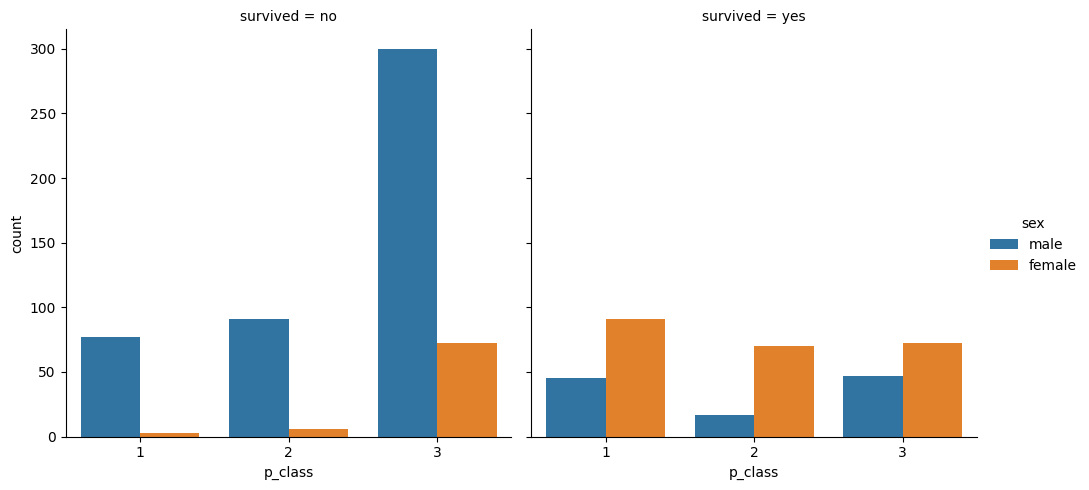

In [112]:
titanic.dropna(subset=['survived', 'p_class', 'sex'], inplace=True)
titanic['p_class'] = titanic['p_class'].astype(int)
sns.catplot(x='p_class', hue='sex', col='survived', data=titanic, kind='count')
plt.show()

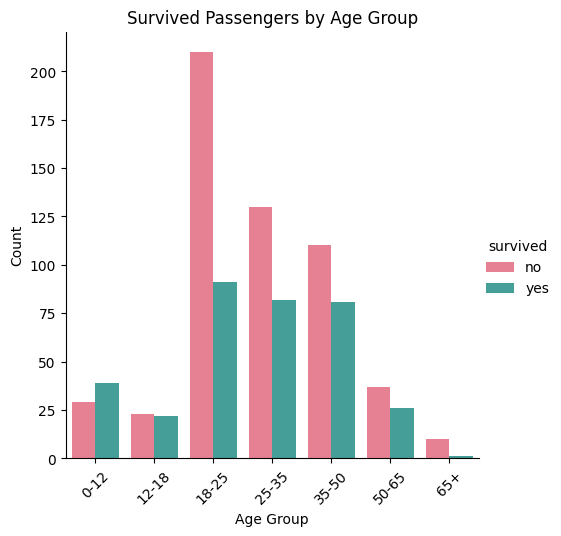

In [113]:
sns.catplot(x='age_groups', hue='survived', data=titanic, kind='count', palette='husl')
plt.title('Survived Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

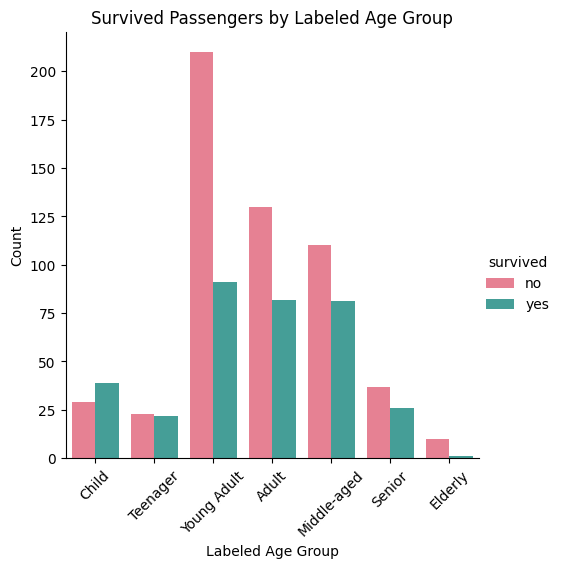

In [119]:
sns.catplot(x='labeled_age_groups', hue='survived', data=titanic, kind='count', palette='husl')
plt.title('Survived Passengers by Labeled Age Group')
plt.xlabel('Labeled Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

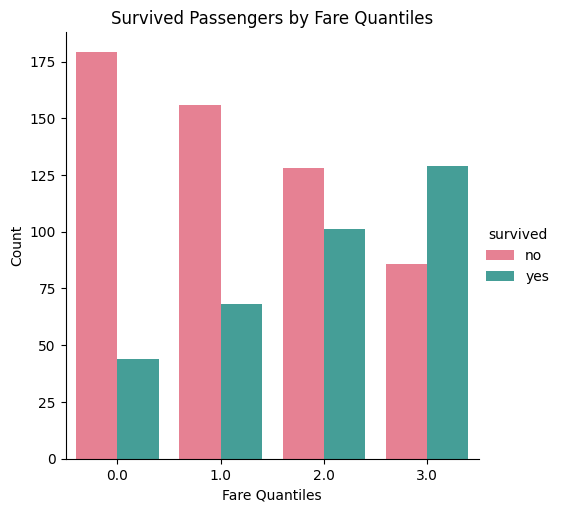

In [121]:
sns.catplot(x='fare_quantiles', hue='survived', data=titanic, kind='count', palette='husl')
plt.title('Survived Passengers by Fare Quantiles')
plt.xlabel('Fare Quantiles')
plt.ylabel('Count')
plt.show()

In [125]:
def top_names(group):
    return group.dropna().value_counts().head(5)

# Group the data by 'p_class' and apply the function to each group
top_names_by_class = titanic['first_name'].groupby(titanic['p_class']).apply(top_names)

# Display the result
print(top_names_by_class)

p_class                      
1                                25
         Emil                     2
         John Bertram             2
         Thomas[60] Thomas Jr     1
         Charles H                1
2                                22
         John William             4
         William                  3
         Samuel                   3
         Benjamin                 2
3                                45
         John                     8
         Patrick                  7
         Ivan                     6
         James                    6
Name: first_name, dtype: int64


In [126]:
name_counts_by_class_sex = titanic.groupby(['p_class', 'sex', 'first_name']).size()

# Extract the top 5 most common names within each class and sex group
top_names_by_class_sex = name_counts_by_class_sex.groupby(['p_class', 'sex']).nlargest(5)

# Display the result
print(top_names_by_class_sex)

p_class  sex     p_class  sex     first_name                                                 
1        female  1        female                                                                  6
                                  "Nellie" Ellen                                                  1
                                  "Suzette" Parker Susan                                          1
                                  (Antoinette) Wendt) Antoinette (née Alfred                      1
                                  (Bessie Bessie C Hudson J (née Waldo Daniels)                   1
         male    1        male                                                                   19
                                  Emil                                                            2
                                  John Bertram                                                    2
                                  "Dick" H. H Dickinson                                           1
      

In [127]:
name_counts_by_class_age = titanic.groupby(['p_class', 'age_groups', 'first_name'], observed=False).size()
top_names_by_class_age = name_counts_by_class_age.groupby(['p_class', 'age_groups'], observed=False).nlargest(5)
print(top_names_by_class_age)

p_class  age_groups  p_class  age_groups  first_name                 
1        0-12        1        0-12                                       4
                                          Helen Loraine                  1
                                          "Andy" Andrew                  0
                                          "Annie Katherine Anna Kate"    0
                                          "Annie" Anna                   0
                                                                        ..
3        65+         3        65+         Frank                          1
                                          Johan                          1
                                          John Patrick                   1
                                                                         0
                                          "Andy" Andrew                  0
Length: 105, dtype: int64


In [128]:
passengers_traveling = titanic['travel_direction'].value_counts()
print(passengers_traveling)

travel_direction
emigrating     969
coming home    335
Name: count, dtype: int64


In [129]:
import re

In [130]:
countries_with_notes = ['Sweden', 'Lebanon', 'US', 'England', 'Bulgaria', 'UK', 'Ireland', 'Denmark',
 'Syria or Lebanon', 'Norway', 'Switzerland', 'France', 'Portugal', 'Canada',
 'Lithuania [76]', 'Finland', 'Belgium', 'Russian Empire', 'South Africa',
 'China', 'Italy', 'Australia', 'Germany', 'Ireland[note 1]', 'Russia', 'Syria',
 'Croatia', 'Macedonia', 'Channel Islands', 'Bosnia', 'Unknown', 'Slovenia',
 'Russian Empire[note 6]', 'Wales', 'Ottoman Empire[note 7]', 'New York City',
 'Peru', 'Spain', 'Scotland', 'Greece', 'Siam[note 5]', 'Cuba', None,
 'The Netherlands', 'Austria', 'North Somerset England', 'Turkey', 'Siam',
 'Argentina', 'Mexico', 'Uruguay', 'UK[note 1]', 'UK[note 3]', 'UK[note 4]',
 'Egypt', 'Syria[81]', 'British India', 'Belarus', 'German Empire[note 2]',
 'England,', 'Russia (Estonia?)', 'Ottoman Empire', 'Poland',
 'British India[note 3]', 'Japan']

# Remove notes and keep only the string part in country names
unique_countries = set(re.sub(r'\s*\[note\s*\d+\]\s*', '', country.strip()) for country in countries_with_notes if country)

# Create DataFrame with unique countries
df_unique_countries = pd.DataFrame({'Country': list(unique_countries)})

print(df_unique_countries)

                   Country
0                   France
1                    Japan
2         Syria or Lebanon
3                  Belgium
4            New York City
5                 Slovenia
6                  Croatia
7                  Uruguay
8                     Siam
9             South Africa
10             Switzerland
11                 England
12                   Italy
13               Australia
14         The Netherlands
15                   Spain
16                 Lebanon
17                      UK
18          Ottoman Empire
19                 Ireland
20          Lithuania [76]
21                  Poland
22                    Peru
23                Scotland
24                   Syria
25                Portugal
26               Macedonia
27                Bulgaria
28                  Greece
29          Russian Empire
30                 Belarus
31                 Unknown
32                 Denmark
33       Russia (Estonia?)
34                  Bosnia
35                  Turkey
3